In [42]:
import pandas as pd
import chardet 
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [2]:
with open('spam.csv','rb') as x:
    result = chardet.detect(x.read())

In [3]:
result

{'encoding': 'Windows-1252', 'confidence': 0.7257971165545478, 'language': ''}

In [4]:
df = pd.read_csv('spam.csv',encoding = 'Windows-1252')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [9]:
df=df.rename(columns = {'v1':'Etiket','v2':'SMS'})

In [10]:
df

,Etiket,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.groupby('Etiket').count()

,SMS
Etiket,
ham,4825
spam,747


In [12]:
df['Etiket'].value_counts()

ham     4825
spam     747
Name: Etiket, dtype: int64

In [13]:
df.describe().T

,count,unique,top,freq
Etiket,5572,2,ham,4825
SMS,5572,5169,"Sorry, I'll call later",30


In [14]:
df = df.drop_duplicates()

In [15]:
df.describe().T

,count,unique,top,freq
Etiket,5169,2,ham,4516
SMS,5169,5169,"Go until jurong point, crazy.. Available only ...",1


In [16]:
df['Char_len']=df['SMS'].apply(len)

/var/folders/wn/4mlmzdqj1zj1svl3yfc19kxw0000gn/T/ipykernel_6110/3935100318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Char_len']=df['SMS'].apply(len)


In [17]:
df

,Etiket,SMS,Char_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

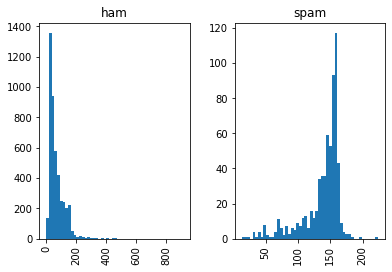

In [18]:
df.hist(column = 'Char_len',by='Etiket',bins=50)

In [19]:
df['Etiket']=df['Etiket'].replace({'ham':0,'spam':1})

/var/folders/wn/4mlmzdqj1zj1svl3yfc19kxw0000gn/T/ipykernel_6110/2998074851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Etiket']=df['Etiket'].replace({'ham':0,'spam':1})


In [20]:
df.reset_index(inplace=True)

In [21]:
df.drop('index',axis=1,inplace=True)

/var/folders/wn/4mlmzdqj1zj1svl3yfc19kxw0000gn/T/ipykernel_6110/173203409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index',axis=1,inplace=True)


In [22]:
df

,Etiket,SMS,Char_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161
5165,0,Will Ì_ b going to esplanade fr home?,37
5166,0,"Pity, * was in mood for that. So...any other s...",57
5167,0,The guy did some bitching but I acted like i'd...,125


In [24]:
mesaj = re.sub('[^a-zA-Z]',' ',df['SMS'][0])

In [25]:
df['SMS']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5164    This is the 2nd time we have tried 2 contact u...
5165                Will Ì_ b going to esplanade fr home?
5166    Pity, * was in mood for that. So...any other s...
5167    The guy did some bitching but I acted like i'd...
5168                           Rofl. Its true to its name
Name: SMS, Length: 5169, dtype: object

In [26]:
def words1(sentence):
  place = re.compile('[^a-zA-Z]')
  return re.sub(place,' ',sentence)

In [27]:
words1('tuyRF,F.t1?')

'tuyRF F t  '

In [28]:
print(df['SMS'][0])
print(words1(df['SMS'][0]))

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   


In [29]:
spam = []
ham = []
for i in range(len(df['SMS'].values)):
  r1 = df['SMS'].values[i]
  r2 = df['Etiket'].values[i]

In [31]:
spam = []
ham = []
allsentence=[]
for i in range(len(df['SMS'].values)):
  r1 = df['SMS'].values[i]
  r2 = df['Etiket'].values[i]

  cleansentence = []
  sentences = words1(r1)
  sentences=sentences.lower()
 
  for words in sentences.split():
    cleansentence.append(words)

    if r2==1:
      spam.append(sentences)
    else:
      ham.append(sentences)
  allsentence.append(' '.join(cleansentence))

df['Newsms']=allsentence

/var/folders/wn/4mlmzdqj1zj1svl3yfc19kxw0000gn/T/ipykernel_6110/3223473462.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Newsms']=allsentence


In [32]:
df

,Etiket,SMS,Char_len,Newsms
0,0,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...
...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161,this is the nd time we have tried contact u u ...
5165,0,Will Ì_ b going to esplanade fr home?,37,will b going to esplanade fr home
5166,0,"Pity, * was in mood for that. So...any other s...",57,pity was in mood for that so any other suggest...
5167,0,The guy did some bitching but I acted like i'd...,125,the guy did some bitching but i acted like i d...


In [33]:
df.drop(['SMS','Char_len'],axis=1,inplace=True)

/var/folders/wn/4mlmzdqj1zj1svl3yfc19kxw0000gn/T/ipykernel_6110/3030870673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['SMS','Char_len'],axis=1,inplace=True)


In [34]:
df

,Etiket,Newsms
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives arou...
...,...,...
5164,1,this is the nd time we have tried contact u u ...
5165,0,will b going to esplanade fr home
5166,0,pity was in mood for that so any other suggest...
5167,0,the guy did some bitching but i acted like i d...


In [37]:
cv = CountVectorizer()
x=cv.fit_transform(df['Newsms']).toarray()

In [38]:
y = df['Etiket']
X=x

In [39]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.75,shuffle=True)

In [40]:
model =MultinomialNB()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [41]:
accuracy_score(ytest,ypred)

0.9760247486465584